##### Trabalho de Inteligencia Artificial
### Rede KNN *(K-NEAREST NEIGHBORS)*

#### Integrantes:
* Lucas Machado Marinho - 11916645
* Pedro Augusto Luiz - 11911935
* Renan de Almeida Leandro - 11801157
* Weverton Samuel Alves - 11917326

In [1]:
# Imports necessários
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import math

# Imports necessários para os algoritmos de busca
from collections import deque
from queue import PriorityQueue
import heapq

# Import necessários para contabilizar o tempo gasto pelas buscas
import time

# Imports necessários para gerar e salvar o gif
#import os
#from PIL import Image
#import imageio

In [2]:
random.seed(9)

In [3]:
def gera_vertices(n):
    vertices = []
    
    for i in range(n):
        x = random.randrange(0,n)
        y = random.randrange(0,n)
        vertices.append((x, y))
    return vertices

In [4]:
def distancia_euclidiana(v1, v2):
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(v1, v2)]))

In [5]:
def gera_arestas(lista_vertices, k):
    arestas = []
    for i, v1 in enumerate(lista_vertices):
        
        distancias = []
        for j, v2 in enumerate(lista_vertices):
            if i != j:
                dist = distancia_euclidiana(v1, v2)
                distancias.append((j, dist))
        
        distancias.sort(key=lambda x: x[1])
        
        for j, dist in distancias[:k]:
            arestas.append((i, j, round(dist, 2)))
    return arestas

In [6]:
def gera_rede_knn(n, k):
    lista_vertices = gera_vertices(n)
    lista_arestas = gera_arestas(lista_vertices, k)
    return lista_vertices, lista_arestas

In [7]:
# gerar a rede
qtdVertices = 100
k = 3

lista_vertices, lista_arestas = gera_rede_knn(qtdVertices, k)

* A lista de vertices contém somente o par X,Y de dados
    * Então cria-se uma lista enumerando os vertices. Ex: lista = [0, ...., qtdVertices-1]

In [8]:
lista_vertices_index = []

In [9]:
for i, val in enumerate(lista_vertices):
    lista_vertices_index.append(i)

#### Criação do grafo
* O objetivo é criar o grafo a partir da lista de arestas (a qual contém o nó inicial, o nó vizinho e a distancia):

In [10]:
G = nx.Graph()

for u, v, dist in lista_arestas:
    G.add_edge(u, v, weight=dist)

#Debugging
#print(G.edges)

In [11]:
# Foi forçado que o grafo, que seria exibido no plano cartesiano, se distribuisse para melhor visualização
# Posições para todos os nós - semente para reprodutibilidade
seed = 9
pos = nx.spring_layout(G, seed = seed, k = 1, iterations = 100, scale = 10) 

### Rede KNN gerada:

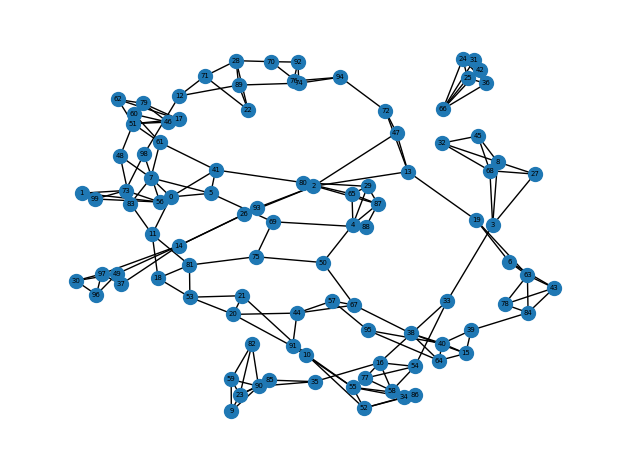

In [12]:
# Nós
nx.draw_networkx_nodes(G, pos, node_size = 100)

# Arestas
nx.draw_networkx_edges(G, pos, width = 1)

# Label do Nó
nx.draw_networkx_labels(G, pos, font_size = 5, font_family = "sans-serif")

# Debugging
# label_pesos = nx.get_edge_attributes(G, "weight")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()

# Exportar o plot como PNG
plt.savefig("plot.png", format="png")
plt.show()

* **Um detalhe sobre essa rede: Ela pode gerar componentes desconexos, como por exemplo, os vertices gerados isoladamente no canto superior direito**

<strong>__________________________________________________________________________________________________</strong>

## Algoritmos de busca
* O objetivo é percorrer a rede desenvolvida utilizando os algoritmos de DFS, BFS, Best-First-Search, A* e Dijkstra
---

Para exibir o percurso na rede com 100 vertices e 3 vizinho, usou-se os seguintes valores 

In [13]:
origem = 0
destino = 63

* Além disso, estas são as pré-definições para a plotagem com cores dos caminhos percorridos

In [14]:
def desenhar_grafo(origem, destino, caminho):
    
    # Desenho do grafo
    labels = {v: v for v in G.nodes()}  # Define os rótulos dos nós
    cores_visitados = ['green' if v == origem else 'red' if v == destino else 'gray' for v in G.nodes()]  # Define as cores dos nós
    cores_visitados = ['blue' if v in caminho else 'gray' for v in G.nodes()]
    
    # Define o tamanho dos objetos do grafo
    nx.draw_networkx_nodes(G, pos, node_color=cores_visitados, node_size=100)
    nx.draw_networkx_edges(G, pos, width=1)
    nx.draw_networkx_labels(G, pos, labels, font_size=5, font_family='sans-serif')

    # Marca o nó origem e destino
    nx.draw_networkx_nodes(G, pos, nodelist=[origem], node_color='green', node_size=100)
    nx.draw_networkx_nodes(G, pos, nodelist=[destino], node_color='red', node_size=100)

    plt.show()  # Exibe o gráfico

# Exemplo de uso:
# desenhar_grafo(G, origem, destino)

### Busca em Profundidade

In [15]:
def dfs(grafo, vertice_inicial, vertice_final):
    visitados = set()  
    pilha = [] 
    caminho = [] 
    distancia = 0 

    pilha.append((vertice_inicial, caminho + [vertice_inicial], distancia)) 

    while pilha:
        vertice, caminho_atual, distancia_atual = pilha.pop()

        if vertice == vertice_final: 
            return caminho_atual, distancia_atual  

        if vertice not in visitados: 
            visitados.add(vertice) 

            for vizinho in grafo[vertice]:  # Percorre todos os vizinhos do vértice atual
                if vizinho not in visitados:  
                    peso = grafo.edges[(vertice, vizinho)]['weight']  # Captura o peso do vértice atual e o vizinho
                    pilha.append((vizinho, caminho_atual + [vizinho], distancia_atual + peso))  # Adiciona o vizinho à pilha

    return [], 0  # Retorna caminho vazio e distância 0 quando não houver caminho encontrado

O caminho percorrido foi: [0, 11, 83, 7, 48, 51, 79, 60, 61, 41, 80, 65, 87, 88, 4, 50, 75, 81, 53, 20, 21, 10, 55, 91, 44, 67, 38, 40, 95, 64, 15, 39, 84, 63]
A distância percorrida foi: 346.02


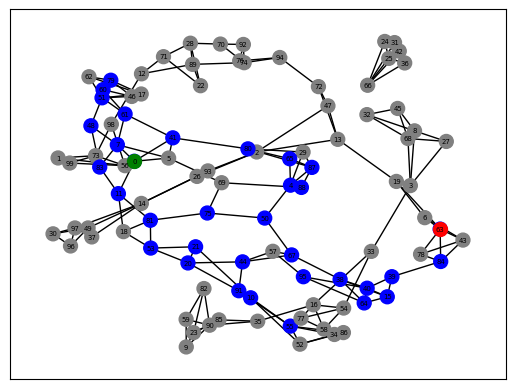

In [16]:
# Executa a busca em profundidade
caminho, distancia = dfs(G, origem, destino)

print(f"O caminho percorrido foi: {caminho}") # Exibe uma lista com os caminhos percorridos
print(f"A distância percorrida foi: {distancia:.2f}") # Exibe a distancia total percorrida

# Desenho do grafo
desenhar_grafo(origem, destino, caminho)

<strong>__________________________________________________________________________________________________</strong>

### Busca em largura

In [17]:
def bfs(vertices, arestas, inicio, fim):
    vizinhos = {v: [] for v in vertices}

    # Adiciona as arestas ao dicionário de vizinhos
    for aresta in arestas:
        u, v, peso = aresta
        vizinhos[u].append((v, peso))
        vizinhos[v].append((u, peso))

    fila = deque([(inicio, [inicio], 0)])  # Cria uma fila para a busca em largura
    visitados = set()  

    while fila:
        vertice, caminho, distancia = fila.popleft()

        if vertice == fim:
            return caminho, distancia  # Retorna o caminho e a distância percorrida

        if vertice in visitados:  
            continue  

        visitados.add(vertice)  

        for vizinho, peso in vizinhos[vertice]:  
            if vizinho not in visitados: 
                fila.append((vizinho, caminho + [vizinho], distancia + peso)) 

    return 0

O caminho percorrido foi: [0, 5, 69, 75, 50, 67, 38, 15, 39, 84, 63]
A distância percorrida foi: 91.15


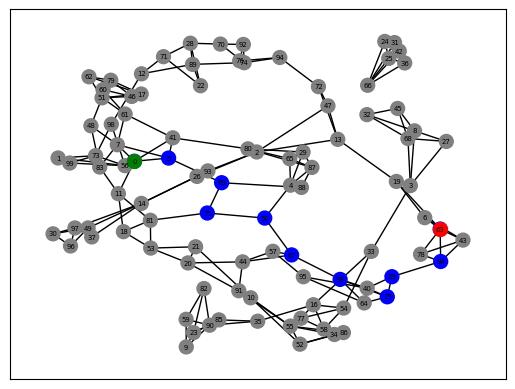

In [18]:
vertices = lista_vertices_index
arestas = lista_arestas

caminho, distancia = bfs(vertices, arestas, origem, destino)

print(f"O caminho percorrido foi: {caminho}")
print(f"A distância percorrida foi: {distancia:.2f}")

desenhar_grafo(origem, destino, caminho)

<strong>__________________________________________________________________________________________________</strong>

### Algoritmo Best-First

In [19]:
def best_first_search(vertices, arestas, origem, destino):
    qtd = len(vertices)
    grafo = [[] for _ in range(qtd)]  # Cria uma lista de adjacência para o grafo

    # Adiciona as arestas à lista de adjacência
    for u, v, peso in arestas:
        grafo[u].append((v, peso))
        grafo[v].append((u, peso))

    visitado = [False] * qtd  # Cria uma lista para armazenar os vértices visitados
    
    # Insere o vértice de origem com custo 0 na fila de prioridade criada
    pq = PriorityQueue()
    pq.put((0, origem)) 
    
    visitado[origem] = True

    caminho = [] 
    distancia = 0 

    while not pq.empty():
        peso, u = pq.get()  # Remove o vértice com menor custo da fila de prioridade
        caminho.append(u)  
        distancia += peso

        if u == destino:  
            break  

        for v, c in grafo[u]:  # Percorre os vizinhos do vértice atual
            if not visitado[v]:
                visitado[v] = True  # Marca o vizinho como visitado
                pq.put((c, v))  # Insere o vizinho na fila de prioridade com o custo correspondente

    return caminho, distancia  # Retorna o caminho percorrido e a distância total

O caminho percorrido foi: [0, 5, 41, 80, 87, 29, 88, 4, 65, 7, 69, 75, 81, 18, 53, 21, 10, 91, 52, 34, 55, 86, 44, 57, 95, 64, 38, 40, 67, 15, 20, 50, 39, 84, 43, 78, 6, 19, 63]
A distância percorrida foi: 290.39


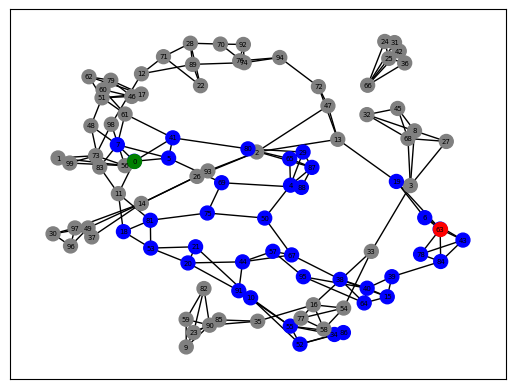

In [20]:
vertices = lista_vertices_index
arestas = lista_arestas

caminho, distancia = best_first_search(vertices, arestas, origem, destino)

print(f"O caminho percorrido foi: {caminho}")
print(f"A distância percorrida foi: {distancia:.2f}")

desenhar_grafo(origem, destino, caminho)

<strong>__________________________________________________________________________________________________</strong>

### Algoritmo A*

In [21]:
def a_estrela(vertices, arestas, origem, destino):
    lista_adjacencia = {v: [] for v in vertices}
    for u, v, peso in arestas:
        lista_adjacencia[u].append((v, peso)) 
        lista_adjacencia[v].append((u, peso))

    lista_ini = set([origem])  
    lista_fin = set([])
    
    # Dicionário para armazenar o custo do caminho percorrido até cada vértice
    g = {}  
    g[origem] = 0

    pais = {}
    pais[origem] = origem

    def h(n):
        x1, y1 = lista_vertices[n]  # Obtém as coordenadas do vértice atual
        x2, y2 = lista_vertices[destino]  # Obtém as coordenadas do vértice de destino
        distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  # Calcula a distância Euclidiana entre os vértices
        return distancia

    while len(lista_ini) > 0:
        n = None

        for v in lista_ini:
            if n == None or g[v] + h(v) < g[n] + h(n):  # Escolhe o vértice com o menor valor de f(n) = g(n) + h(n)
                n = v

        if n == None: 
            return []
        
        # Se o vértice atual é o destino, reconstrói o caminho percorrido
        if n == destino:  
            reconstrucao = []
            
            # Percorre os pais dos vértices até chegar à origem
            while pais[n] != n:  
                reconstrucao.append(n)
                n = pais[n]

            reconstrucao.append(origem)
            reconstrucao.reverse()
            
            # Obtém a distância total percorrida
            distancia = g[destino]  
            return reconstrucao, distancia

        for (m, peso) in lista_adjacencia[n]:
            if m not in lista_ini and m not in lista_fin:  # Se o vértice não está nem na lista inicial nem na final
                lista_ini.add(m)  # Adiciona o vértice à lista inicial
                pais[m] = n  # Define o vértice atual como o pai do vértice adicionado
                g[m] = g[n] + peso  # Atualiza o custo do caminho percorrido até o vértice
            else:
                if g[m] > g[n] + peso:  # Se o caminho atual é melhor que o anteriormente calculado
                    g[m] = g[n] + peso  # Atualiza o custo do caminho percorrido até o vértice
                    pais[m] = n  # Define o vértice atual como o novo pai do vértice
                    if m in lista_fin:  # Se o vértice está na lista final, move-o para a lista inicial
                        lista_fin.remove(m)
                        lista_ini.add(m)

        lista_ini.remove(n) 
        lista_fin.add(n) 

    return []

O caminho percorrido foi: [0, 5, 69, 75, 50, 67, 38, 15, 39, 84, 63]
A distância percorrida foi: 91.15


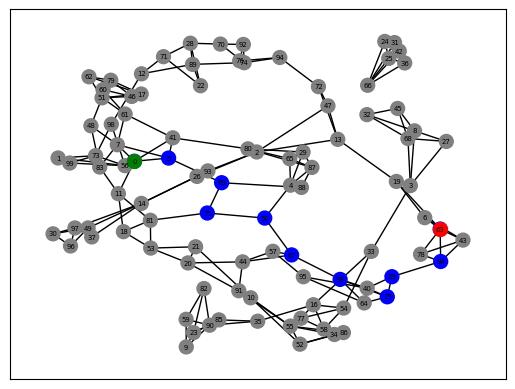

In [22]:
vertices = lista_vertices_index
arestas = lista_arestas

caminho, distancia = a_estrela(vertices, arestas, origem, destino)
print(f"O caminho percorrido foi: {caminho}")
print(f"A distância percorrida foi: {distancia:.2f}")

desenhar_grafo(origem, destino, caminho)

<strong>__________________________________________________________________________________________________</strong>

### Algoritmo Dijkstra

In [23]:
def dijkstra(vertices, arestas, origem, destino):
    qtd = len(vertices)
    grafo = [[] for _ in range(qtd)]  # Cria uma lista de adjacência vazia para cada vértice

    for u, v, peso in arestas:
        grafo[u].append((v, peso))  # Adiciona as arestas ao grafo
        grafo[v].append((u, peso))

    distancia = [float('inf')] * qtd  # Inicializa todas as distâncias com infinito
    distancia[origem] = 0

    pq = [(0, origem)]  # Inicializa a fila de prioridade com o vértice de origem
    visitado = set() 

    # Dicionário para armazenar o nó anterior no caminho mais curto
    antecessores = {}

    while pq:
        dist_atual, vert_atual = heapq.heappop(pq)  # Obtém o vértice com menor distância atual

        if vert_atual == destino:  
            break

        if dist_atual > distancia[vert_atual]:
            continue

        visitado.add(vert_atual)
        
        # Calcula a nova distância até o vizinho
        for vizinho, peso in grafo[vert_atual]:
            nova_dist = distancia[vert_atual] + peso  

            if nova_dist < distancia[vizinho]:  # Se a nova distância é menor do que a distância armazenada
                distancia[vizinho] = nova_dist  # Atualiza a distância do vizinho
                heapq.heappush(pq, (nova_dist, vizinho))  # Adiciona o vizinho à fila de prioridade
                antecessores[vizinho] = vert_atual  # Atualiza o vértice anterior no caminho mais curto

    # Verifica se o caminho foi encontrado, entretanto, caso nao seja encontrado, é retornado uma lista vazia.
    if destino not in antecessores:
        return [], 0

    # Reconstrução do caminho percorrido
    caminho = []
    atual = destino
    while atual != origem:
        caminho.append(atual)
        atual = antecessores[atual]
    caminho.append(origem)
    caminho.reverse()

    
    distancia_total = distancia[destino]

    if distancia_total == float('inf'):
        distancia_total = 0

    return caminho, distancia_total

O caminho percorrido foi: [0, 5, 69, 75, 50, 67, 38, 15, 39, 84, 63]
A distância percorrida foi: 91.15


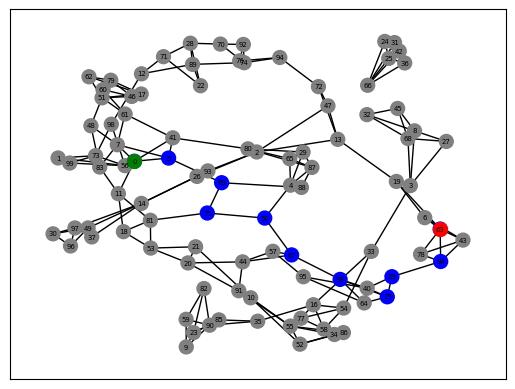

In [24]:
vertices = lista_vertices_index
arestas = lista_arestas

caminho, distancia_total = dijkstra(vertices, arestas, origem, destino)
print(f"O caminho percorrido foi: {caminho}")
print(f"A distância percorrida foi: {distancia:.2f}")

desenhar_grafo(origem, destino, caminho)

<strong>__________________________________________________________________________________________________</strong>

## Calculo dos tempos de execução
* O objetivo é calcular o tempo médio de execução e a distancia média de cada um dos algoritmos 
---

* Gerando numeros aleatórios para executar nas funções de busca

In [25]:
vert_ini = random.randint(0, qtdVertices)
vert_fin = random.randint(0, qtdVertices)

### Profundidade

In [26]:
lista_tempo_profundidade = []
lista_distancias_profundidade = []

i = 0
#Enquanto o num de iterações válidas(retorna caminho válido) não acontecer 10 vezes.
while i <= 9:    
    st = time.time()
    caminho, distancia = dfs(G, vert_ini, vert_fin)
    #Função sleep utilizada para evitar que certos valores de tempo sofram 'round' para 0.
    time.sleep(0.3)
    et = time.time()
    
    resultado = et-st-0.3
    #Caso o retorno seja um valor válido, continue.
    if len(caminho) != 0:
        lista_tempo_profundidade.append(resultado)
        lista_distancias_profundidade.append(distancia)
        i += 1

In [27]:
tempo_medio_dfs = sum(lista_tempo_profundidade)/len(lista_tempo_profundidade)

print(f"Tempo médio do DFS para n='{qtdVertices}' e k='{k}' é: {tempo_medio_dfs:.4f}")

Tempo médio do DFS para n='100' e k='3' é: 0.0058


In [28]:
distancia_media_dfs = sum(lista_distancias_profundidade)/len(lista_distancias_profundidade)

print(f"Distância média do DFS para n='{qtdVertices}' e k='{k}' é: {distancia_media_dfs:.4f}")

Distância média do DFS para n='100' e k='3' é: 187.1800


### Largura

In [29]:
lista_tempo_largura = []
lista_distancias_largura = []

i = 0
#Enquanto o num de iterações válidas(retorna caminho válido) não acontecer 10 vezes.
while i <= 9:    
    st = time.time()
    caminho, distancia = bfs(lista_vertices_index, lista_arestas, vert_ini, vert_fin)
    #Função sleep utilizada para evitar que certos valores de tempo sofram 'round' para 0.
    time.sleep(0.3)
    et = time.time()
    
    resultado = et-st-0.3
    #Caso o retorno seja um valor válido, continue.
    if len(caminho) != 0:
        lista_tempo_largura.append(resultado)
        lista_distancias_largura.append(distancia)
        i += 1

In [30]:
tempo_medio_bfs = sum(lista_tempo_largura)/len(lista_tempo_largura)

print(f"Tempo médio do DFS para n='{qtdVertices}' e k='{k}' é: {tempo_medio_bfs:.4f}")

Tempo médio do DFS para n='100' e k='3' é: 0.0082


In [31]:
distancia_media_bfs = sum(lista_distancias_largura)/len(lista_distancias_largura)

print(f"Distância média do BFS para n='{qtdVertices}' e k='{k}' é: {distancia_media_bfs:.4f}")

Distância média do BFS para n='100' e k='3' é: 90.8900


### Best first

In [32]:
lista_tempo_best_first = []
lista_distancias_best_first = []

i = 0
#Enquanto o num de iterações válidas(retorna caminho válido) não acontecer 10 vezes.
while i <= 9:    
    st = time.time()
    caminho, distancia = best_first_search(lista_vertices_index, lista_arestas, vert_ini, vert_fin)
    #Função sleep utilizada para evitar que certos valores de tempo sofram 'round' para 0.
    time.sleep(0.3)
    et = time.time()
    
    resultado = et-st-0.3
    #Caso o retorno seja um valor válido, continue.
    if len(caminho) != 0:
        lista_tempo_best_first.append(resultado)
        lista_distancias_best_first.append(distancia)
        i += 1

In [33]:
tempo_medio_bestf = sum(lista_tempo_best_first)/len(lista_tempo_best_first)

print(f"Tempo médio do Best-First para n='{qtdVertices}' e k='{k}' é: {tempo_medio_bestf:.4f}")

Tempo médio do Best-First para n='100' e k='3' é: 0.0092


In [34]:
distancia_media_bestf = sum(lista_distancias_best_first)/len(lista_distancias_best_first)

print(f"Distância média do Best-First para n='{qtdVertices}' e k='{k}' é: {distancia_media_bestf:.4f}")

Distância média do Best-First para n='100' e k='3' é: 474.2600


### A*

In [35]:
lista_tempo_A = []
lista_distancias_A = []

i = 0
#Enquanto o num de iterações válidas(retorna caminho válido) não acontecer 10 vezes.
while i <= 9:    
    st = time.time()
    caminho, distancia = a_estrela(lista_vertices_index, lista_arestas, vert_ini, vert_fin)
    #Função sleep utilizada para evitar que certos valores de tempo sofram 'round' para 0.
    time.sleep(0.3)
    et = time.time()
    
    resultado = et-st-0.3
    #Caso o retorno seja um valor válido, continue.
    if len(caminho) != 0:
        lista_tempo_A.append(resultado)
        lista_distancias_A.append(distancia)
        i += 1

In [36]:
tempo_medio_a = sum(lista_tempo_A)/len(lista_tempo_A)

print(f"Tempo médio do A* para n='{qtdVertices}' e k='{k}' é: {tempo_medio_a:.4f}")

Tempo médio do A* para n='100' e k='3' é: 0.0095


In [37]:
distancia_media_a = sum(lista_distancias_A)/len(lista_distancias_A)

print(f"Distância média do A* para n='{qtdVertices}' e k='{k}' é: {distancia_media_a:.4f}")

Distância média do A* para n='100' e k='3' é: 90.8900


### Dijkstra

In [38]:
lista_tempo_dijkstra = []
lista_distancias_dijkstra = []

i = 0
#Enquanto o num de iterações válidas(retorna caminho válido) não acontecer 10 vezes.
while i <= 9:
    st = time.time()
    caminho, distancia = dijkstra(lista_vertices_index, lista_arestas, vert_ini, vert_fin)
    #Função sleep utilizada para evitar que certos valores de tempo sofram 'round' para 0.
    time.sleep(0.3)
    et = time.time()
    
    resultado = et-st-0.3
    #Caso o retorno seja um valor válido, continue.
    if len(caminho) != 0:
        lista_tempo_dijkstra.append(resultado)
        lista_distancias_dijkstra.append(distancia)
        i += 1

In [39]:
tempo_medio_dijkstra = sum(lista_tempo_dijkstra)/len(lista_tempo_dijkstra)

print(f"Tempo médio do Dijkstra para n='{qtdVertices}' e k='{k}' é: {tempo_medio_dijkstra:.4f}")

Tempo médio do Dijkstra para n='100' e k='3' é: 0.0076


In [40]:
distancia_media_dijkstra = sum(lista_distancias_dijkstra)/len(lista_distancias_dijkstra)

print(f"Distância média do Dijkstra para n='{qtdVertices}' e k='{k}' é: {distancia_media_dijkstra:.4f}")

Distância média do Dijkstra para n='100' e k='3' é: 90.8900


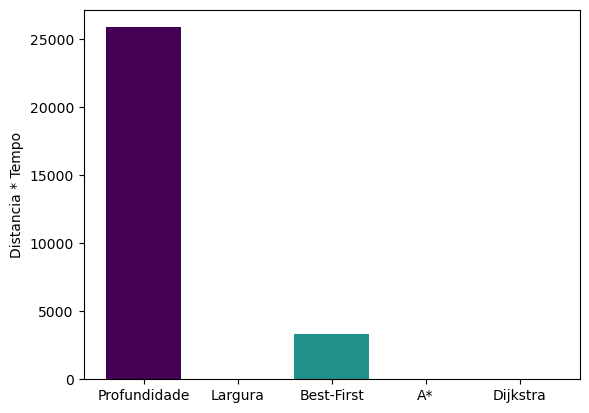

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Vetores de distâncias e tempos
tempos = [0.2278, 0.0385, 0.0536, 0.0457, 0.0391]
distancias = [113473.000, 680.4399, 61387.8100, 655.16, 655.16]

# Calcular o produto entre distâncias e tempos
produtos = [dist * temp for dist, temp in zip(distancias, tempos)]

# Definir mapa de cores
colormap = plt.cm.viridis  # Escolha o mapa de cores desejado

# Criar o gráfico de barras com escala de cores
plt.bar(range(len(produtos)), produtos, color=colormap(np.linspace(0, 1, len(produtos))))

# Adicionar rótulos aos eixos x e y
plt.xlabel('')
plt.ylabel('Distancia * Tempo')

# Adicionar rótulos personalizados para cada barra
plt.xticks(range(len(produtos)), ['Profundidade', 'Largura', 'Best-First', 'A*', 'Dijkstra'])

# Adicionar barra de cores
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_array([])
#plt.colorbar(sm)

# Exibir o gráfico
plt.show()